In [ ]:
# !pip install xlrd 
# !pip install openpyxl

In [10]:
!nvidia-smi

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2, 3"

import numpy as np
import cv2
import matplotlib.pyplot as plt
import SimpleITK as sitk
import cv2
from tqdm import tqdm

import sys
sys.path.append(os.path.abspath('/workspace/sunggu'))
sys.path.append(os.path.abspath('/workspace/sunggu/MONAI'))
from sunggu_utils import check_value, take_list, plot_confusion_matrix, list_sort_nicely, find_dir

Tue Oct 12 03:36:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     Off  | 00000000:18:00.0 Off |                  Off |
| 35%   61C    P2   254W / 260W |   6102MiB / 48601MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 8000     Off  | 00000000:3B:00.0 Off |                  Off |
| 40%   

# 이미지와 라벨 마스크와의 정보 차이 Check

In [16]:
import pandas as pd
from pandas import Series, DataFrame
import SimpleITK as sitk
import glob

##### Setting

In [45]:
# # X
# hist_dict_X = dict()
# for i in range(-1028, 3096, 1): # Range -1024 ~ 3071
#     hist_dict_X[str(i)] = 0
    
# 80
hist_dict_80 = dict()
for i in range(-1028, 3096, 1): # Range -1024 ~ 3071
    hist_dict_80[str(i)] = 0
    
# 60
hist_dict_60 = dict()
for i in range(-1028, 3096, 1): # Range -1024 ~ 3071
    hist_dict_60[str(i)] = 0
    
# 40
hist_dict_40 = dict()
for i in range(-1028, 3096, 1): # Range -1024 ~ 3071
    hist_dict_40[str(i)] = 0
    
# 20
hist_dict_20 = dict()
for i in range(-1028, 3096, 1): # Range -1024 ~ 3071
    hist_dict_20[str(i)] = 0

In [46]:
# # X
# for idx in range(len(intensitiy_X)):
#     value, counts = np.unique(intensitiy_X[idx], return_counts=True)
    
#     for k, v in zip(value, counts):
#         hist_dict_X[str(int(k))] += v.item()

# 80
for idx in range(len(intensitiy_80)):
    value, counts = np.unique(intensitiy_80[idx], return_counts=True)
    
    for k, v in zip(value, counts):
        hist_dict_80[str(int(k))] += v.item()

# 60
for idx in range(len(intensitiy_60)):
    value, counts = np.unique(intensitiy_60[idx], return_counts=True)
    
    for k, v in zip(value, counts):
        hist_dict_60[str(int(k))] += v.item()

# 40    
for idx in range(len(intensitiy_40)):
    value, counts = np.unique(intensitiy_40[idx], return_counts=True)
    
    for k, v in zip(value, counts):
        hist_dict_40[str(int(k))] += v.item()

# 20        
for idx in range(len(intensitiy_20)):
    value, counts = np.unique(intensitiy_20[idx], return_counts=True)
    
    for k, v in zip(value, counts):
        hist_dict_20[str(int(k))] += v.item()

In [47]:
# df_X = pd.DataFrame()
# df_X['intensity'] = list(map(int, hist_dict_X.keys()))
# df_X['freq']      = hist_dict_X.values()

df_80 = pd.DataFrame()
df_80['intensity'] = list(map(int, hist_dict_80.keys()))
df_80['freq']      = hist_dict_80.values()

df_60 = pd.DataFrame()
df_60['intensity'] = list(map(int, hist_dict_60.keys()))
df_60['freq']      = hist_dict_60.values()

df_40 = pd.DataFrame()
df_40['intensity'] = list(map(int, hist_dict_40.keys()))
df_40['freq']      = hist_dict_40.values()

df_20 = pd.DataFrame()
df_20['intensity'] = list(map(int, hist_dict_20.keys()))
df_20['freq']      = hist_dict_20.values()

In [80]:
df_80[df_80['intensity'] <= -1000]

intensity      freq
0       -1028         0
1       -1027         0
2       -1026         0
3       -1025         0
4       -1024  13071140
5       -1023   1080338
6       -1022   1166588
7       -1021   1261226
8       -1020   1374142
9       -1019   1509097
10      -1018   1674504
11      -1017   1881038
12      -1016   2141434
13      -1015   2476524
14      -1014   2911650
15      -1013   3491527
16      -1012   4263307
17      -1011   5293389
18      -1010   6672604
19      -1009   8528301
20      -1008  10961762
21      -1007  14099037
22      -1006  18040182
23      -1005  22780591
24      -1004  28158074
25      -1003  33759463
26      -1002  38893876
27      -1001  42659760
28      -1000  44321955

In [85]:
df_40[df_40['intensity'] >= 3070]

intensity    freq
4098       3070      46
4099       3071  141196
4100       3072       0
4101       3073       0
4102       3074       0
4103       3075       0
4104       3076       0
4105       3077       0
4106       3078       0
4107       3079       0
4108       3080       0
4109       3081       0
4110       3082       0
4111       3083       0
4112       3084       0
4113       3085       0
4114       3086       0
4115       3087       0
4116       3088       0
4117       3089       0
4118       3090       0
4119       3091       0
4120       3092       0
4121       3093       0
4122       3094       0
4123       3095       0

In [50]:
img.shape

(512, 512, 3)

In [ ]:

# if self.patch_size: # patch training -> 심히 이상...
#     x = x.view(-1, 1, self.patch_size, self.patch_size)
#     y = y.view(-1, 1, self.patch_size, self.patch_size)

In [73]:
img.shape

(512, 512, 3)

In [74]:
g = np.expand_dims(img, axis=0)

In [75]:
g.shape

(1, 512, 512, 3)

In [76]:
t = g.reshape(-1, 128, 128, 3)

In [79]:
len(t)

16

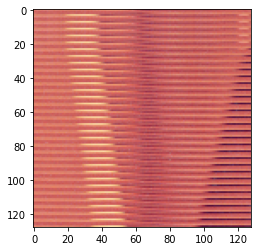

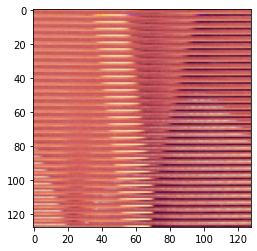

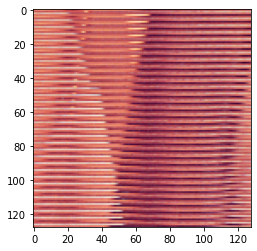

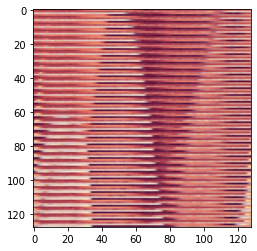

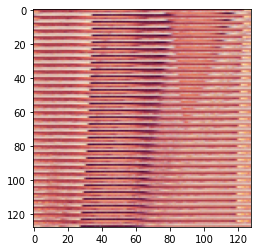

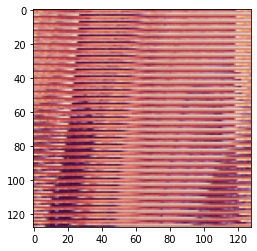

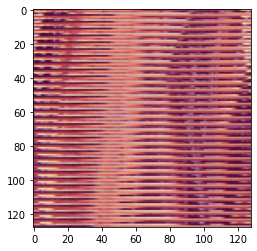

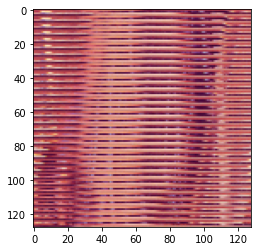

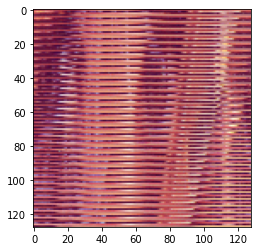

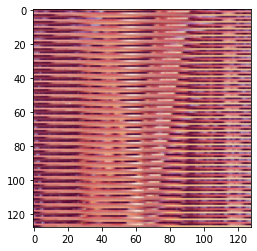

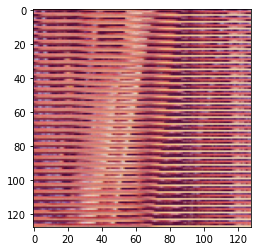

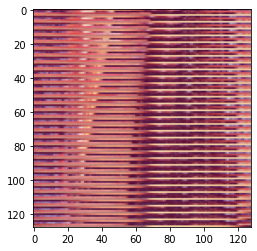

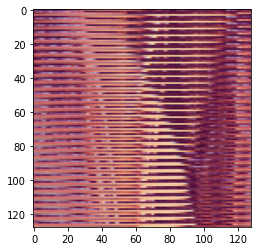

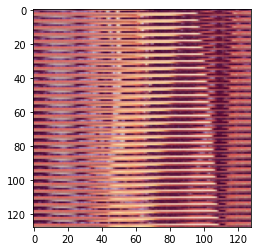

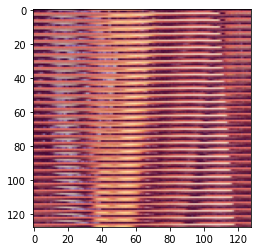

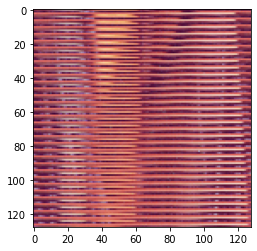

In [78]:
for i in range(len(t)):
    plt.imshow(t[i])
    plt.show()

In [ ]:
# 실험

(512, 512, 3)


IndexError: invalid index to scalar variable.

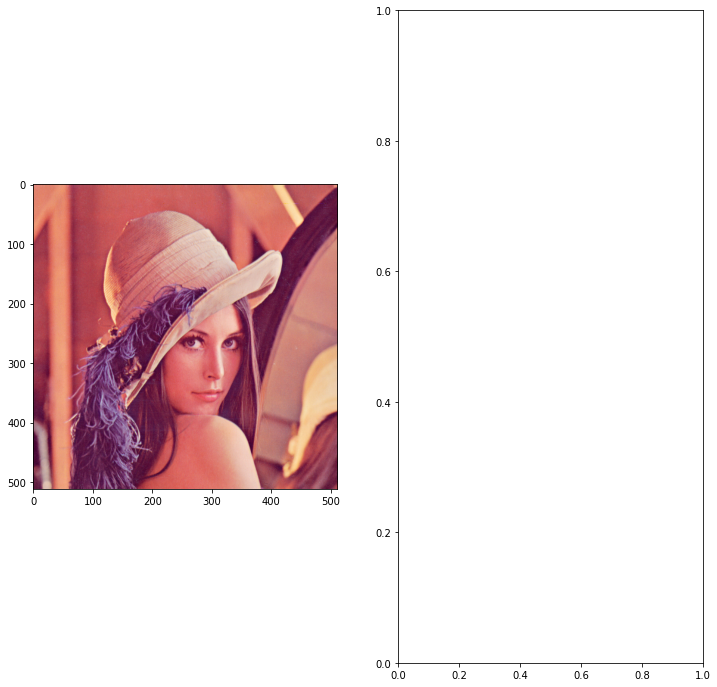

In [49]:
img = plt.imread('/workspace/sunggu/Public_dataset/lena.png')
print(img.shape)


plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(k['image'])

# 전처리 후에 EDA

In [31]:
import re
import glob
import numpy as np
import pydicom
import matplotlib.pyplot as plt 
from monai.transforms import *
from monai.data import Dataset

def list_sort_nicely(l):   
    def tryint(s):        
        try:            
            return int(s)        
        except:            
            return s
        
    def alphanum_key(s):
        return [ tryint(c) for c in re.split('([0-9]+)', s) ]
    l.sort(key=alphanum_key)    
    return l

def get_pixels_hu(path):
    # pydicom version...!
    # referred from https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial
    # ref: pydicom.pixel_data_handlers.util.apply_modality_lut
    # '''
    # Awesome pydicom lut fuction...!
    # ds  = pydicom.dcmread(fname)
    # arr = ds.pixel_array
    # hu  = apply_modality_lut(arr, ds)
    # '''
    dcm_image = pydicom.read_file(path)
    image = dcm_image.pixel_array
    image = image.astype(np.int16)
    image[image == -2000] = 0

    intercept = dcm_image.RescaleIntercept
    slope     = dcm_image.RescaleSlope

    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)

    image += np.int16(intercept)
    # print(image.shape) # (512, 512)
    return np.array(image, dtype=np.int16)

def dicom_normalize(image, MIN_HU=-1024.0, MAX_HU=3072.0):   # I already check the max value is 3072.0
   image = (image - MIN_HU) / (MAX_HU - MIN_HU)   # Range  0.0 ~ 1.0
   # image = (image - 0.5) / 0.5                  # Range -1.0 ~ 1.0   @ We do not use -1~1 range becuase there is no Tanh act.
   return image


In [78]:
def Sinogram_Dataset_DCM(mode, patch_training):
    if mode == 'train':
        n_20_imgs   = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/20/*/*/*.dcm')) + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/20/*/*/*.dcm'))
        n_100_imgs  = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/X/*/*/*.dcm'))  + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/X/*/*/*.dcm'))

        files = [{"n_20": n_20, "n_100": n_100} for n_20, n_100 in zip(n_20_imgs, n_100_imgs)]            
        print("Train [Total]  number = ", len(n_20_imgs))

        # CT에 맞는 Augmentation
        if patch_training:
            transforms = Compose(
                [
                    Lambdad(keys=["n_20", "n_100"], func=get_pixels_hu),
                    Lambdad(keys=["n_20", "n_100"], func=dicom_normalize),
                    AddChanneld(keys=["n_20", "n_100"]),                 

                    # Crop  
                    RandSpatialCropSamplesd(keys=["n_20", "n_100"], roi_size=(64, 64), num_samples=8, random_center=True, random_size=False, meta_keys=None, allow_missing_keys=False), 
                        # patch training, next(iter(loader)) output : list로 sample 만큼,,, 그 List 안에 (B, C, H, W)

                    # (45 degree rotation, vertical & horizontal flip & scaling)
                    RandFlipd(keys=["n_20", "n_100"], prob=0.1, spatial_axis=[0, 1], allow_missing_keys=False),
                    RandRotated(keys=["n_20", "n_100"], prob=0.1, range_x=np.pi/4, range_y=np.pi/4, range_z=0.0, keep_size=True, align_corners=False, allow_missing_keys=False),
                    RandZoomd(keys=["n_20", "n_100"], prob=0.1, min_zoom=0.5, max_zoom=2.0, align_corners=None, keep_size=True, allow_missing_keys=False),
                    ToTensord(keys=["n_20", "n_100"]),
                ]
            )  

        else :
            transforms = Compose(
                [
                    Lambdad(keys=["n_20", "n_100"], func=get_pixels_hu),
                    Lambdad(keys=["n_20", "n_100"], func=dicom_normalize),
                    AddChanneld(keys=["n_20", "n_100"]),                 

                    # (45 degree rotation, vertical & horizontal flip & scaling)
                    RandFlipd(keys=["n_20", "n_100"], prob=0.1, spatial_axis=[0, 1], allow_missing_keys=False),
                    RandRotated(keys=["n_20", "n_100"], prob=0.1, range_x=np.pi/4, range_y=np.pi/4, range_z=0.0, keep_size=True, align_corners=False, allow_missing_keys=False),
                    RandZoomd(keys=["n_20", "n_100"], prob=0.1, min_zoom=0.5, max_zoom=2.0, align_corners=None, keep_size=True, allow_missing_keys=False),
                    ToTensord(keys=["n_20", "n_100"]),
                ]
            )              

    elif mode == 'valid':
        n_20_imgs   = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Sample/20/*/*/*.dcm'))
        n_100_imgs  = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Sample/X/*/*/*.dcm'))        

        files = [{"n_20": n_20, "n_100": n_100} for n_20, n_100 in zip(n_20_imgs, n_100_imgs)]
        print("Valid [Total]  number = ", len(n_20_imgs))

        # CT에 맞는 Augmentation
        transforms = Compose(
            [
                Lambdad(keys=["n_20", "n_100"], func=get_pixels_hu),
                Lambdad(keys=["n_20", "n_100"], func=dicom_normalize),
                AddChanneld(keys=["n_20", "n_100"]),         
                ToTensord(keys=["n_20", "n_100"]),
            ]
        )    

    return Dataset(data=files, transform=transforms)


In [79]:
dataset = Sinogram_Dataset_DCM(mode='train', patch_training=False)

Train [Total]  number =  6899


In [80]:
def dicom_denormalize(image, MIN_HU=-1024.0, MAX_HU=3072.0):
    # image = (image - 0.5) / 0.5           # Range -1.0 ~ 1.0   @ We do not use -1~1 range becuase there is no Tanh act.
    image = (MAX_HU - MIN_HU)*image + MIN_HU
    return image


In [81]:
sample = dataset[30]
n_20   = dicom_denormalize(sample['n_20']).clip(min=0, max=80)
n_100  = dicom_denormalize(sample['n_100']).clip(min=0, max=80)

In [84]:
sample = dataset[30]
n_20   = sample['n_20']
n_100  = sample['n_100']

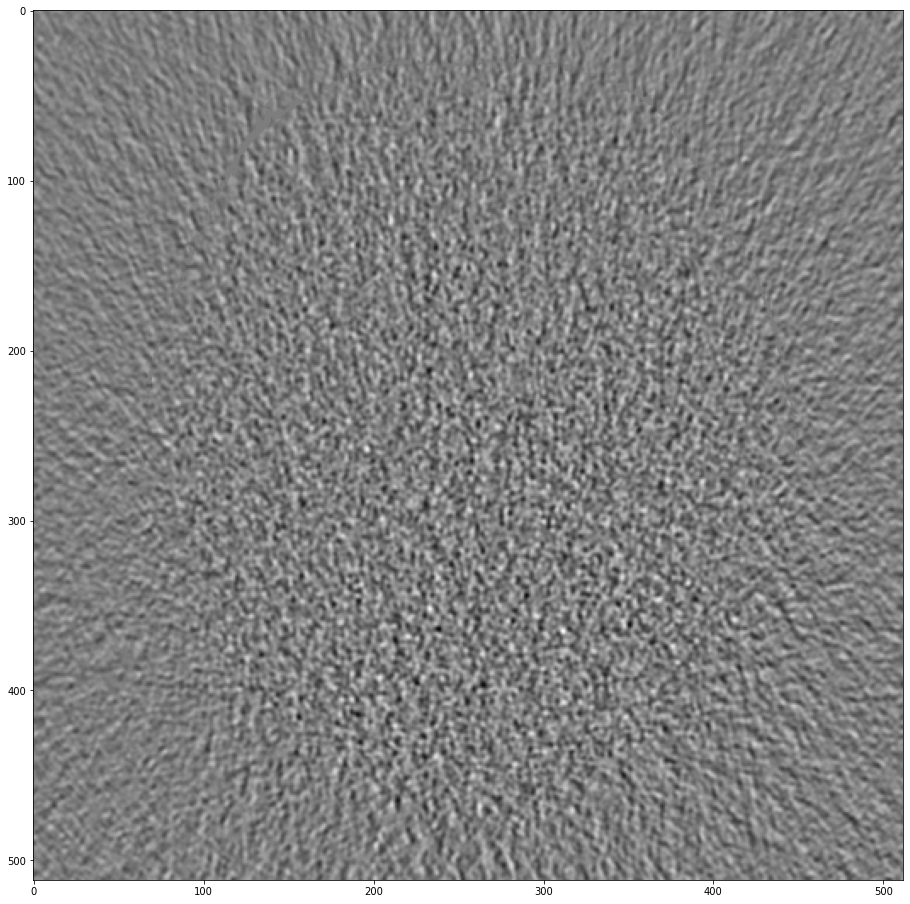

In [85]:
plt.figure(figsize=(16, 16))
plt.imshow(n_100.squeeze() - n_20.squeeze(), 'gray')

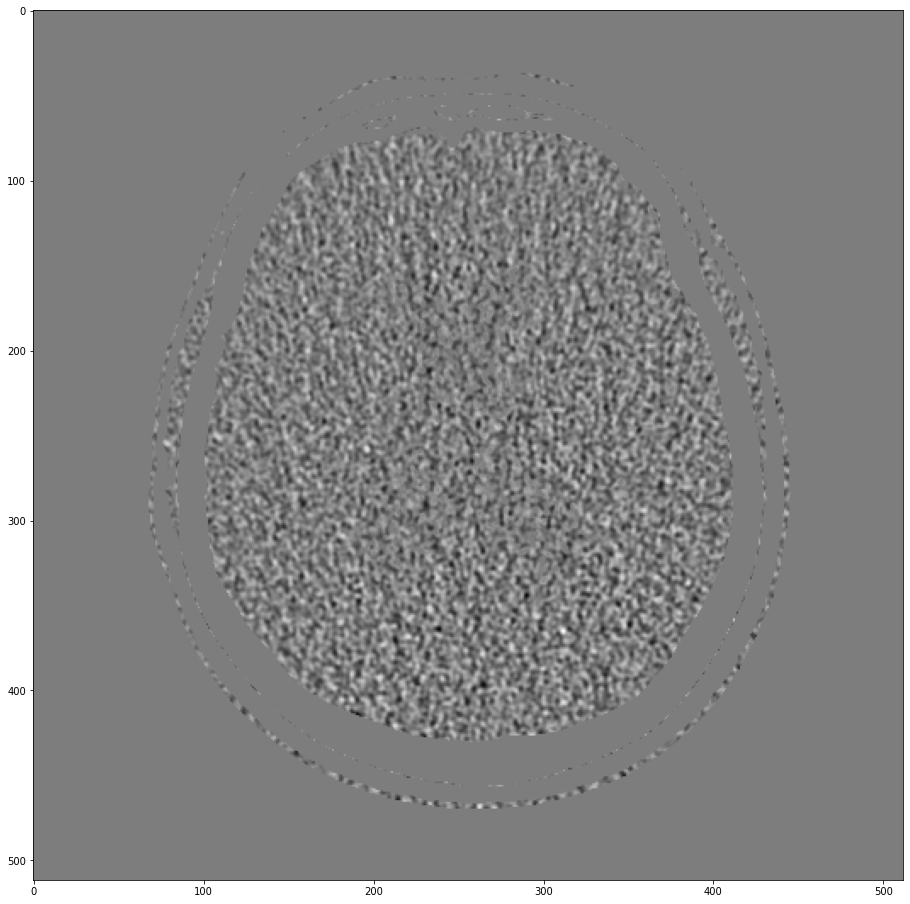

In [82]:
plt.figure(figsize=(16, 16))
plt.imshow(n_100.squeeze() - n_20.squeeze(), 'gray')

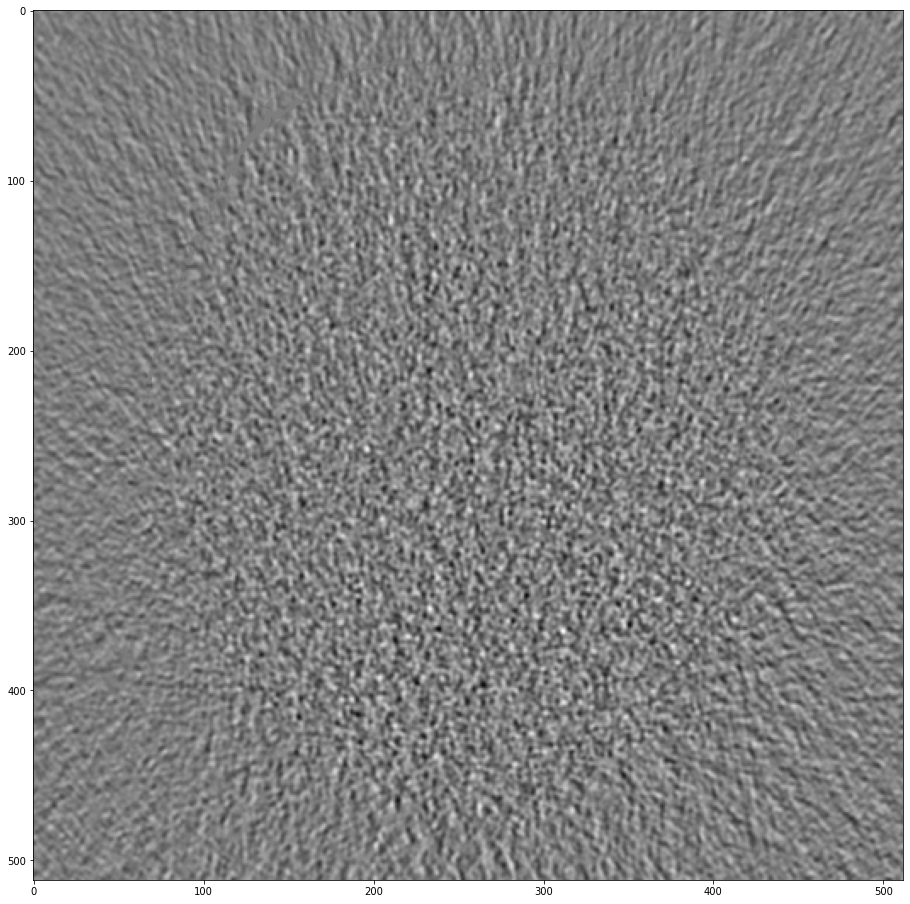

In [42]:
plt.figure(figsize=(16, 16))
plt.imshow(n_100.squeeze() - n_20.squeeze(), 'gray')

In [61]:
np.arange(len(profile)).shape

(512,)

In [62]:
profile.shape

torch.Size([512])

Text(0.5, 1.0, '250')

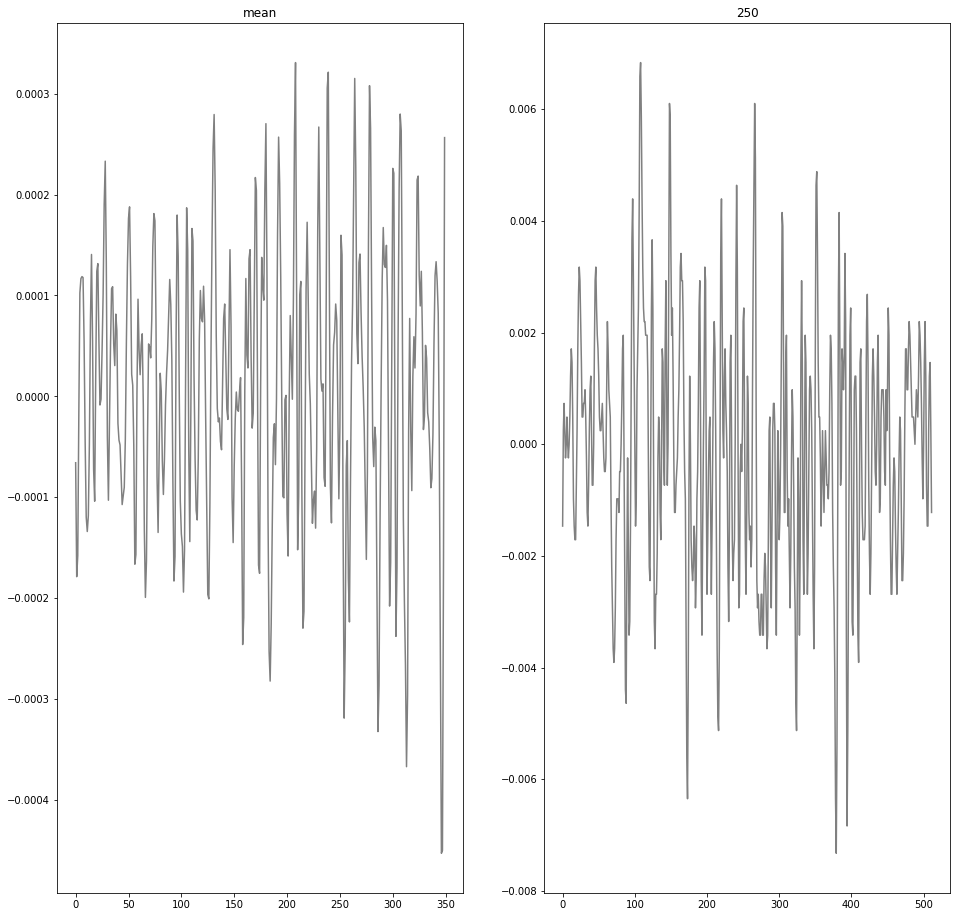

In [68]:
plt.figure(figsize=(16, 16))
profile = (n_100.squeeze() - n_20.squeeze())[50:400, :]
profile = profile.mean(dim=1)
plt.subplot(121)
plt.plot(profile, 'gray')
plt.title('mean')

profile = (n_100.squeeze() - n_20.squeeze())[250, :]
plt.subplot(122)
plt.plot(profile, 'gray')
plt.title('250')

In [ ]:
plt.imshow(n_20.squeeze() - n_100.squeeze(), 'gray')